**Policy Improvement Using TD Update,SARSA and Q-learning**

In [3]:
import numpy as np
import random
from matplotlib import pyplot as plt
from tqdm import tqdm

The code in the cells before question 1 begins is the same as in assignment 2.

In [46]:
START_STATE = (0,0)
TER_STATE = (5,5)
PEN_STATE = (5,2)
HOLES = [(3,2),(4,2)]
Actions = ['U','D','L','R']

In [47]:
#To check if a state is legal or not
def is_legal(State):
    if (State[0] >= 0) and (State[0] <= 5):
        if (State[1] >= 0) and (State[1] <= 5):
                if State != HOLES[0] and State != HOLES[1]:
                    return True
    return False

In [48]:
#Returns reward for a particular state
def return_reward(S):
    if S == PEN_STATE:
        return(-15)
    elif S == TER_STATE:
        return (15)
    else:
        return(0)

In [49]:
#returns the change of coordinate after an action
def movement(S,A):
    if A=='U':
        return S[0],S[1]+1
    elif A=='D':
        return S[0],S[1]-1
    elif A=='L':
        return S[0]-1,S[1]
    elif A=='R':
        return S[0]+1,S[1]
    else:
        return S[0],S[1]

In [50]:
#Defines the next state after performing an action on the current state
def nxtState(S,A):
    if A == "U":
        act = np.random.choice(["U", "L", "R", "S"], p=[0.8, 0.05, 0.05, 0.1])
    elif A == "D":
        act = np.random.choice(["D", "L", "R", "S"], p=[0.8, 0.05, 0.05,  0.1])
    elif A == "L":
        act = np.random.choice(["L", "U", "D", "S"], p=[0.8, 0.05, 0.05, 0.1])
    elif A == "R":
        act =  np.random.choice(["R", "U", "D", "S"], p=[0.8, 0.05, 0.05, 0.1])
        
    state = movement(S,act)
    
    if is_legal(state):
        return state
    return S

In [51]:
#defines a random policy i.e. each action is equally likely
def random_policy():
    pi = {}
    for i in range(6):
        for j in range(6):
            if (i,j) != HOLES[0] and (i,j) != HOLES[1] and (i,j) != TER_STATE:
                pi[(i,j)] = [0.25]*4
    
    return(pi)

In [52]:
#returns the probabilites of ending up at different states when taking action on a state
def transition(S, A):
    nxtState = [S]
    prob = [0.1] 
    
    if A == 'U':
        if is_legal((S[0],S[1]+1)) == True:
            nxtState.append((S[0],S[1]+1))
            prob.append(0.8)
        else:
            prob[0]+=0.8
            
        if is_legal((S[0]-1,S[1])) == True:
            nxtState.append((S[0]-1,S[1]))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
        if is_legal((S[0]+1,S[1])) == True:
            nxtState.append((S[0]+1,S[1]))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
    elif A == 'D':
        if is_legal((S[0],S[1]-1)) == True:
            nxtState.append((S[0],S[1]-1))
            prob.append(0.8)
        else:
            prob[0]+=0.8
            
        if is_legal((S[0]-1,S[1])) == True:
            nxtState.append((S[0]-1,S[1]))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
        if is_legal((S[0]+1,S[1])) == True:
            nxtState.append((S[0]+1,S[1]))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
    elif A == 'L':
        if is_legal((S[0]-1,S[1])) == True:
            nxtState.append((S[0]-1,S[1]))
            prob.append(0.8)
        else:
            prob[0]+=0.8
            
        if is_legal((S[0],S[1]+1)) == True:
            nxtState.append((S[0],S[1]+1))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
        if is_legal((S[0],S[1]-1)) == True:
            nxtState.append((S[0],S[1]-1))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
    else:
        if is_legal((S[0]+1,S[1])) == True:
            nxtState.append((S[0]+1,S[1]))
            prob.append(0.8)
        else:
            prob[0]+=0.8
            
        if is_legal((S[0],S[1]+1)) == True:
            nxtState.append((S[0],S[1]+1))
            prob.append(0.05)
        else:
            prob[0]+=0.05
            
        if is_legal((S[0],S[1]-1)) == True:
            nxtState.append((S[0],S[1]-1))
            prob.append(0.05)
        else:
            prob[0]+=0.05
    
    return nxtState, prob



**TD Updates**

In [53]:
#Value Function
V={}
for i in range(6):
    for j in range(6):
            V[(i,j)]=0

In [54]:
gamma=0.9
def TD_epi(S,V,alpha,update=True):  #returns the sqaured TD erros for an episode
      tde = []
      while S!=TER_STATE:
          A = np.random.choice(Actions, p=policy[S])
          S0 = nxtState(S,A)
          R = return_reward(S0)
          td_err = R + gamma*V[S0] - V[S]
          if update==True:
             V[S]=V[S] + alpha*(td_err)
          tde.append(td_err)
          S=S0

      tde_sq=[x**2 for x in tde]
      return tde_sq



In [11]:
def TD_sim(episodes,alpha,update=True):#setting update to true will update the Q-values whereas setting it to false will not
   total=0
   count=0
   for i in range(episodes):
     j=random.randint(0, 5)
     start=(1,j)
     tde_sq = TD_epi(start, V, alpha,update)
     total+= sum(tde_sq)
     count+= len(tde_sq)

   avg=total/count
   return avg

In [55]:
#initializing the value function
def init_Val(val):
  for i in range(0,6):
    for j in range(0,6):
       state=(i,j)
       if state != HOLES[0] and state != HOLES[1]:
         val[state]=0
       else:
         val[state]="NA"

In [34]:
policy=random_policy()
alphas=np.linspace(0.001, 0.2, num=200)
avg_tde = []
V = {} 
for a in alphas:
  init_Val(V)
  TD_sim(100, a, update=True) #estimating using td
  avg_tde.append(TD_sim(100, a, update=False)) #for plotting (no update)
    

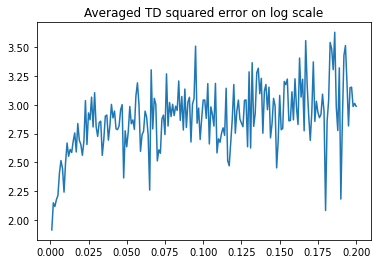

In [35]:
plt.title("Averaged TD squared error on log scale")
plt.plot(alphas,np.log(avg_tde))
plt.show()



Here 'alpha' and 'gamma' refer to their usual meaning i.e. the step size and the discount rate.'e' refers to the epsilon value.

**Tabular Estimation**

In [20]:
def init_actval(Q):
  for a in Actions:
    for i in range(0,6):
      for j in range(0,6):
          if (i, j) != HOLES[0] and (i, j) != HOLES[1] and (i,j)!=TER_STATE:
              Q[(i,j),a]=np.random.random()
          else:
              Q[(i,j),a]=0

In [57]:
Q={}
init_actval(Q)

In [61]:
def init_policy():
  policy={}
  for i in range(0,6):
    for j in range(0,6):
      if (i,j) != HOLES[0] and  (i,j)!= HOLES[1]:
        policy[(i,j)]=[0, 0, 0, 0]
  return policy

In [12]:
def update_policy(Q,e,policy):#Policy update according to the epsilon-greedy policy
    for s in policy:
        argmax="U"
        max=Q[s,"U"]
        for a in Actions:
            if Q[s,a]>max:
                argmax = a
                max = Q[s,a]
        P =[e/4,e/4,e/4,e/4]
        maxi = Actions.index(argmax)
        P[maxi]+= 1-e
        policy[s] = P

In [62]:
def sarsa_episode(Q,alpha,e): 
    rew = 0
    S=START_STATE
    while S!= TER_STATE:
      A = np.random.choice(Actions, p=policy[S]) 
      S0 = nxtState(S,A)
      R = return_reward(S0)
      rew+=R
      A0=np.random.choice(Actions, p=policy[S0])
      Q[(S,A)]=Q[(S,A)]+alpha*(R+0.9*Q[(S0,A0)]-Q[(S,A)])
      S=S0
      update_policy(Q,e,policy)
    return rew

In [63]:
def sarsa(episodes,alpha,e):
   init_actval(Q)
   update_policy(Q, e, policy)#first update is a random epsilon greedy policy since our Qvalues are random
   rewards=[]
   for i in range(episodes):
       rewards.append(sarsa_episode(Q, alpha, e))
   return rewards

In [20]:
def Qlearning_epi(Q,alpha,e):
    S = START_STATE
    rew = 0
    while S!=TER_STATE:
      A=np.random.choice(Actions, p=policy[S])
      S0=nxtState(S,A)
      R = return_reward(S0)
      rew+=R
      maxQ = max([Q[S0,a] for a in Actions])
      Q[S,A]=Q[S,A] + alpha*(R+0.9*maxQ-Q[S,A])
      S=S0
      update_policy(Q, e, policy)
    return rew

In [21]:
def Qlearning(episodes,alpha,e):
    init_actval(Q)
    update_policy(Q, e, policy)#first epsilon greedy policy according to random Q values
    rewards = []
    for i in range(episodes):
        rewards.append(Qlearning_epi(Q, alpha, e))
    return rewards

Here I found step_size alpha=0.2 and epsilon=0.1 works wells.

In [25]:
policy = init_policy()

episodes=np.arange(1,201)
rewards_SARSA=np.zeros(200)
rewards_Qlearning=np.zeros(200)
for i in tqdm(range(1000)):
    rewards_SARSA+=np.array(sarsa(200,0.2,0.1))
    rewards_Qlearning+=np.array(Qlearning(200,0.2,0.1))
rewards_SARSA/=1000
rewards_Qlearning/=1000

100%|██████████| 1000/1000 [28:00<00:00,  1.68s/it]


Plot of both SARSA and QLearning using tabular estimation

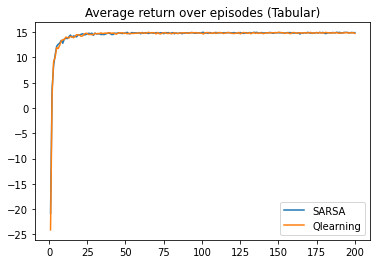

In [26]:
plt.title("Average return over episodes (Tabular)")
plt.plot(episodes,rewards_SARSA,label="SARSA")
plt.plot(episodes,rewards_Qlearning,label="Qlearning")
plt.legend()
plt.show()

**Linear Approximation**

I am using the state-action pair as a linear combination. We have a total of 144 such combination (36 states and 4 action for each state). I am using one hot encoding to get a 144 dim-vector for our linear approximation.

In [64]:
l=list(Q.keys())
def encode(S,A):
   X=np.zeros(144)
   np.put(X,l.index((S,A)),1)
   return X



In [65]:
#We get Q value as linear combination of weights and encoding
def updateQ(weights):
    Q={}
    for a in Actions:
        for i in range(0, 6):
            for j in range(0, 6):
                if (i, j) != (3, 2) and (i, j) != (4, 2):
                    Q[(i, j), a] = np.dot(weights,encode(i,j))
    return Q

Implementing the SARSA semi-gradient algorithm

In [85]:
def sarsa_gradient_epi(alpha,e,weights):
    rew = 0
    S = START_STATE
    while S != TER_STATE:
        A = np.random.choice(Actions, p=policy[S]) 
        S0 = nxtState(S,A)
        R = return_reward(S0)
        rew+= R
        A0 = np.random.choice(Actions, p=policy[S0])
        delta = R + 0.9*(weights[l.index((S0,A0))]-weights[l.index((S,A))])
        weights+= alpha*delta*encode(S,A)
        S=S0
        Q=updateQ(weights)
        update_policy(Q,e,policy)
    return rew 

In [86]:

def sarsa_gradient(episodes,alpha,e):
    Q={}
    init_actval(Q)
    weights=np.zeros(144)
    Q = updateQ(weights)
    #random epsilon greedy policy
    for s in policy:
        P = [e / 4, e / 4, e / 4, e / 4]
        x = np.random.choice([0, 1, 2, 3], p=[0.25, 0.25, 0.25, 0.25])
        P[x]+= 1 - e
        policy[s] = P
    rewards = []
    for i in range(episodes):
        rew = sarsa_gradient_epi(alpha, e,weights)
        rewards.append(rew)
    return rewards

Implementing the Q-learning semi-gradient algorithm

In [87]:
def qlearning_gradient_epi(alpha,e,weights):
    rew = 0
    S = START_STATE
    while S != TER_STATE:
        A = np.random.choice(Actions, p=policy[S])  # choose action according to the policy
        S0=nxtState(S,A)
        R = return_reward(S0)
        rew+= R
        Qhat= [q(S,a,weights) for a in Actions]
        delta = (R + 0.9 *(max(Qhat) - q(S,A,weights)))
        weights+= alpha * delta * encode(S, A)
        S=S0
        Q = updateQ(weights)
        update_policy(Q, e, policy)

    return rew

In [88]:
def Qlearning_gradient(episodes,alpha,e):
    Q={}
    init_actval(Q)
    weights = np.zeros(144)
    Q = updateQ(weights)
    for s in policy: #random intial policy
        P = [e / 4, e / 4, e / 4, e / 4]
        x = np.random.choice([0, 1, 2, 3], p=[0.25, 0.25, 0.25, 0.25])
        P[x]+= 1 - e
        policy[s] = P
    rewards = []
    for i in range(episodes):
        rew = qlearning_gradient_epi(alpha,e,weights)
        rewards.append(rew)
    return rewards

Here again, I found that step_size alpha=0.2 and epsilon=0.1 works wells. So have again used it for plotting rewards.

In [89]:
policy =  init_policy()
Q={}
init_actval(Q)
rewards_SARSA = np.zeros(200)
rewards_Qlearning = np.zeros(200)
for i in range(1000):
    rewards_SARSA+=np.array(sarsa_gradient(200, 0.2, 0.1))
    rewards_Qlearning+= np.array(Qlearning_gradient(200, 0.2, 0.1))
rewards_SARSA/=1000
rewards_Qlearning/=1000

Plot of both SARSA and QLearning algorithms for average reward over episodes using linear approximation.

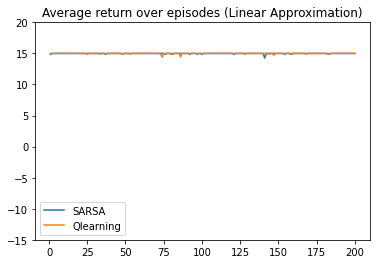

In [92]:
plt.title("Average return over episodes (Linear Approximation)")
plt.plot(episodes,rewards_SARSA,label="SARSA")
plt.plot(episodes,rewards_Qlearning,label="Qlearning")
plt.ylim(-15,20)
plt.legend()
plt.show()

In [1]:
def is_legal(state): 
    if state[0]<1 or state[0]>4 or state[1]<1 or state[1]>12:
        return False 
    return True

In [4]:
def movement(S,A):
    if A=='U':
        return S[0],S[1]+1
    elif A=='D':
        return S[0],S[1]-1
    elif A=='L':
        return S[0]-1,S[1]
    elif A=='R':
        return S[0]+1,S[1]
    else:
        return S[0],S[1]

In [24]:
Actions =["U","L","R","D"]
START_STATE = (4,1)
TER_STATE = (4,12)
CLIFF=[]
for j in range(2,12):
    CLIFF.append((4,j))

In [34]:
def nxtState(S, A):
    reward = -1
    nxt_state = movement(S,A)
    if is_legal(nxt_state)==True:
        S = nxt_state

    if nxt_state in CLIFF:
        S = (4,1)
        reward=-100

    return (S,reward)


In [32]:
policy={}
def init_policy(e):
 for i in range (1,5):
    for j in range(1,13):
         P = [e/4, e/4, e/4, e/4]
         x= np.random.randint(0, 4)
         P[x]+=1-e
         policy[(i,j)]=P

In [22]:

Q={}
def init_actval(Q):
 for a in Actions:
  for i in range(1,5):
    for j in range(1,13):
      if i==4 and j!=1:
         Q[(i, j),a] = np.random.random()
      else:
         Q[(i, j),a] = 0

Here I had to make some slight changes to the sarsa_episode and qleaning_episode function from the previous question to suit this problem. It is just due to the way nxtState function is implemented to return both reward and the next state 

In [13]:
def sarsa_episode(Q,alpha,e):   
    rew = 0
    S=START_STATE
    while S!= TER_STATE:
      A = np.random.choice(Actions, p=policy[S]) 
      S0,R = nxtState(S,A)
      rew+=R
      A0=np.random.choice(Actions, p=policy[S0])
      Q[(S,A)]=Q[(S,A)]+alpha*(R+0.9*Q[(S0,A0)]-Q[(S,A)])
      S=S0
      update_policy(Q,e,policy)
    return rew

In [29]:
def sarsa(episodes,alpha,e):
   init_actval(Q)
   update_policy(Q, e, policy) #epsilon-greedy policy according to random intial Qvalues
   rewards=[]
   for i in range(episodes):
       rewards.append(sarsa_episode(Q, alpha, e))
   return rewards

In [17]:
def Qlearning_epi(Q,alpha,e):
    S = START_STATE
    rew = 0
    while S!=TER_STATE:
      A=np.random.choice(Actions, p=policy[S])
      S0,R = nxtState(S,A)
      rew+=R
      maxQ = max([Q[S0,a] for a in Actions])
      Q[S,A]=Q[S,A] + alpha*(R+0.9*maxQ-Q[S,A])
      S=S0
      update_policy(Q, e, policy)
    return rew

In [30]:
def Qlearning(episodes,alpha,e):
    init_actval(Q)
    update_policy(Q, e, policy)#epsilon-greedy policy according to random intial Qvalues
    rewards = []
    for i in range(episodes):
        rewards.append(Qlearning_epi(Q, alpha, e))
    return rewards

Plot of average rewards over espiodes to see how Qlearning and SARSA algorithm perform for different values of epsilon.

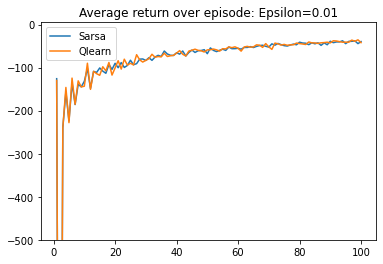

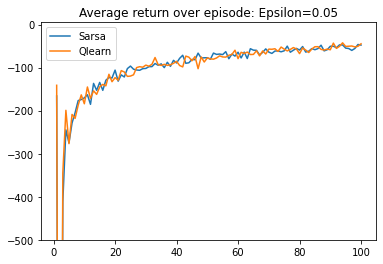

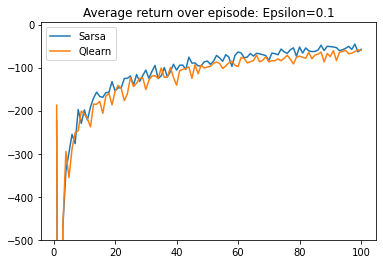

In [47]:
epsilon = [0.01,0.05,0.1]
episodes=np.arange(1,101)
for i in range(len(epsilon)):
  rewards_SARSA=np.zeros(100)
  rewards_Qlearning=np.zeros(100)
  for j in range(1000):
    rewards_SARSA+= np.array(sarsa(100,0.1,epsilon[i])) 
    rewards_Qlearning+= np.array(Qlearning(100,0.1,epsilon[i]))
  rewards_SARSA/=1000
  rewards_Qlearning/=1000
  tit = "Average return over episode: Epsilon="+str(epsilon[i])
  plt.figure(i)
  plt.title(tit)
  plt.plot(episodes,rewards_SARSA,label="Sarsa")
  plt.plot(episodes,rewards_Qlearning,label="Qlearn")
  plt.ylim(-500,5)
  plt.legend()
  plt.show()